<a href="https://colab.research.google.com/github/wsj20010128/ML_Notes/blob/main/05-Hyper-Parameters/05-Hyper-Parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyper Parameterrs

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9916666666666667

## Find the best k

In [5]:
best_score = 0.0
best_k = -1

for k in range(1, 11):
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train, y_train)
  score = knn_clf.score(X_test, y_test)
  if score > best_score:
    best_k = k
    best_score = score

print("best_k =", best_k)
print("best_score =", best_score)

best_k = 3
best_score = 0.9916666666666667


## Consider Distance

In [7]:
best_method = ""
best_score = 0.0
best_k = -1

for method in ["uniform", "distance"]:
  for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
      best_k = k
      best_score = score
      best_method = method

print("best_method =", best_method)
print("best_k =", best_k)
print("best_score =", best_score)

best_method = uniform
best_k = 3
best_score = 0.9916666666666667


## Minkowski Distance
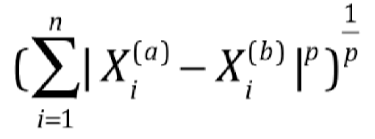

## Search best p for Minkowski Distance

In [9]:
%%time

best_p = -1
best_score = 0.0
best_k = -1

for k in range(1, 11):
  for p in range(1, 6):
    knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
      best_k = k
      best_score = score
      best_p = p

print("best_p =", best_p)
print("best_k =", best_k)
print("best_score =", best_score)

best_p = 2
best_k = 3
best_score = 0.9916666666666667
CPU times: user 49.9 s, sys: 1.07 s, total: 51 s
Wall time: 49.9 s
